In [1]:
from cProfile import label
import numpy as np
import matplotlib.pyplot as plt
import itertools
import cvxpy as cp
import pickle
import manygrid

from compute_solns import *

In [2]:
# Set up game

risk_levels = np.linspace(0,2,21)
proj_risk_l = lambda r: proj_risk(r,risk_levels)
rows, cols = 6, 7
grid = manygrid.ManyGrid(rows=rows, cols=cols, proj_risk=proj_risk_l, risk_levels=risk_levels)
grid.addPlayer("H",1,2)
grid.addPlayer("R",1,1)

for i in [0,rows-1]:    
    for j in range(cols):
        grid.addWall(i,j)
for i in range(rows):    
    for j in [0,cols-1]:
        grid.addWall(i,j)

grid.addWall(3,4)
grid.addWall(4,4)
grid.addWall(3,5)
grid.addWall(4,5)
grid.addWall(4,1)
grid.addWall(2,4)
grid.addWall(2,5)
grid.addWall(1,5)
grid.addWall(4,3)
grid.addWall(3,3)
grid.addWall(2,3)

grid.addSquare(str(0.1),3,1,0.1)
grid.addSquare(str(0.2),4,2,0.2)

grid.addButtonDoor("B",2,1,1,3)
grid.addButtonDoor("C",1,4,3,2)

state_names, states = grid.get_all_states()

human_actions = grid.actions
robot_actions = grid.actions

gamma = 1
T = 10

transition = grid.transition
reward = grid.reward

In [3]:
state_names, states = grid.get_all_states()
print(len(states))

6804


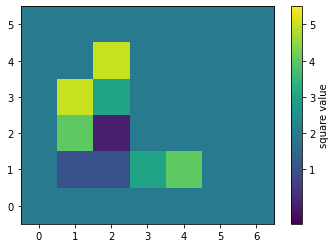

In [4]:
initial_state = grid.get_state()
grid.render()

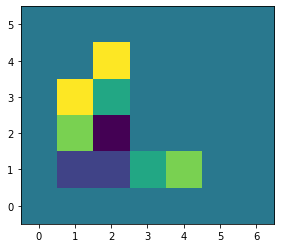

In [5]:
game = manygrid.get_game(grid,gamma,T)
initial_state = grid.get_state()
grid.render()

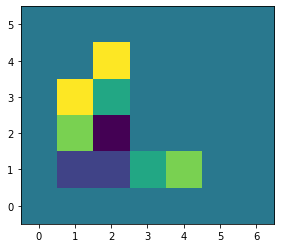

In [6]:
# v_funs, uHs, uRs_coop, uRs_adv = compute_baseline(game)
grid.set_state(initial_state)
grid.render()

((1, 2, 1, 1, 0, 0), 0.1)
((1, 2, 1, 1, 0, 0), 0.1)
((1, 2, 2, 1, 0, 0), 0.1) (0, 0, 0)
((1, 2, 2, 1, 1, 0), 0.1) (0, 0, 0)
((1, 3, 1, 1, 1, 0), 0.1) (0, 0, 0)
((1, 4, 1, 1, 1, 0), 0.1) (0, 0, 0)
((1, 4, 1, 1, 1, 1), 0.1) (0, 0, 0)
((1, 3, 1, 1, 1, 1), 0.1) (0, 0, 0)
((1, 2, 1, 1, 1, 1), 0.1) (0, 0, 0)
((2, 2, 1, 1, 1, 1), 0.1) (0, 0, 0)
((3, 2, 1, 1, 1, 1), 0.1) (0, 0, 0)
((4, 2, 1, 1, 1, 1), 0.1) (0.2, 0.2, 0.2)
((4, 2, 1, 1, 1, 1), 0.1) (0.2, 0.2, 0.2)
((4, 2, 1, 1, 1, 1), 0.1) (0.2, 0.2, 0.2)


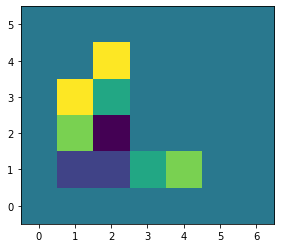

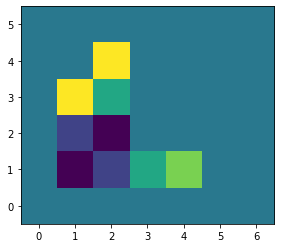

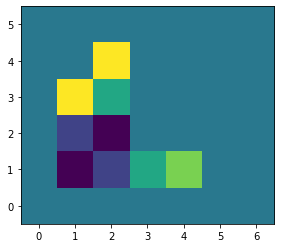

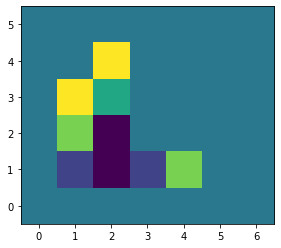

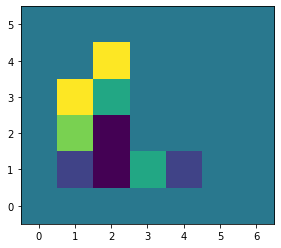

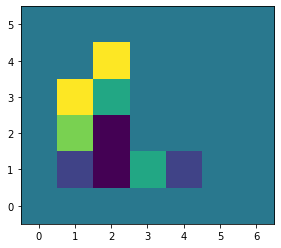

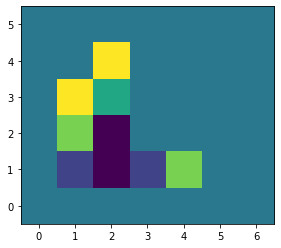

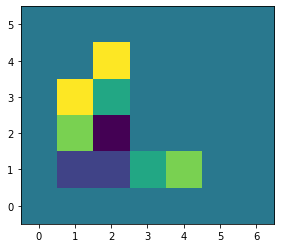

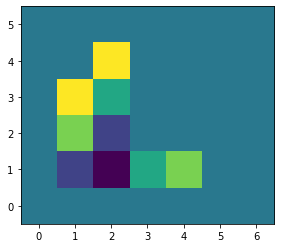

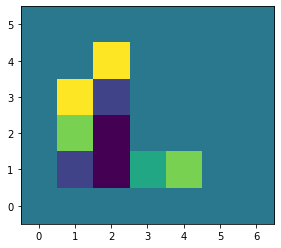

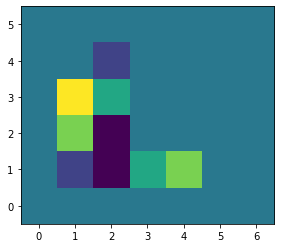

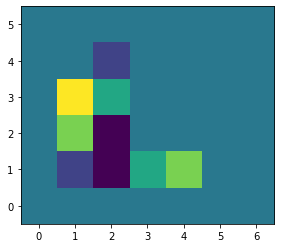

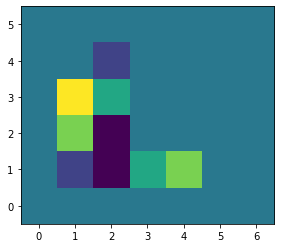

In [7]:
print(initial_state)
grid.run_traj(initial_state, [(None,"U"),(None,"S"),("R","D"),("R",None),("S",None),("L",None),("L",None),("U",None),("U",None),("U",None),(None,None),(None,None)])

In [8]:
name = "manygrid_example_a_10"
manygrid.run_exp(grid,manygrid.get_game(grid,gamma,T), False,T=T, name=name)

Checking if solutions exist...
Loading solutions...
No solutions, so now computing solutions...
Computing baseline...
9, 8, 7, 6, 5, 4, 3, 2, 1, 0, Done with baseline!
Computing maximax...
9, 8, 7, 6, 5, 4, 3, 2, 1, 0, Done with maximax!
Computing ex post solution...
9, Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-11
8, 7, 6, 5, 4, 3, 2, 1, 0, Done with ex post!
Saving solutions
Done!


In [9]:
# 8mins, 78 mins, 35 mins, 70 mins
grid.set_state(initial_state)
grid.set_epsilon(1.0)
state = grid.get_state()
print(state)

((1, 2, 1, 1, 0, 0), 1.0)


In [12]:
res = manygrid.run_sim_single(state, grid, 10, T=T, name=name)

Computing statistics against different agents
('gift', 'coop')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'coop')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'coop')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'coop')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'coop')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'coop')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'coop')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'coop')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'coop')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'coop')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'adv')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'adv')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'adv')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'adv')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'adv')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'adv')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'adv')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'adv')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'adv')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'adv')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'random')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'random')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'rand

<ErrorbarContainer object of 3 artists>

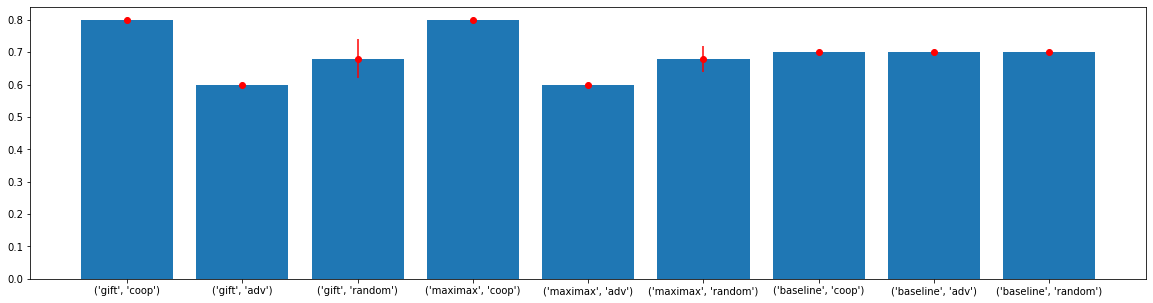

In [13]:

ress = list(zip(*res.items()))
x,z = ress[0],ress[1]
x = [str(i) for i in x]
y = [i[0] for i in z]
c  = [i[1] for i in z]
plt.figure(figsize=(20,5))
plt.bar(x,y)
plt.errorbar(x, y, yerr=c, fmt="o", color="r")

In [14]:
res

{('gift', 'coop'): (0.8, 0.0),
 ('gift', 'adv'): (0.5999999999999999, 1.1102230246251565e-16),
 ('gift', 'random'): (0.6799999999999999, 0.06000000000000001),
 ('maximax', 'coop'): (0.8, 0.0),
 ('maximax', 'adv'): (0.5999999999999999, 1.1102230246251565e-16),
 ('maximax', 'random'): (0.6799999999999999, 0.039999999999999994),
 ('baseline', 'coop'): (0.7, 0.0),
 ('baseline', 'adv'): (0.7, 0.0),
 ('baseline', 'random'): (0.7, 0.0)}

In [15]:
res = manygrid.run_sim_single(state, grid, 1, T=T, name=name)

Computing statistics against different agents
('gift', 'coop')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'adv')
((1, 2, 1, 1, 0, 0), 1.0)
('gift', 'random')
((1, 2, 1, 1, 0, 0), 1.0)
('maximax', 'coop')
(1, 2, 1, 1, 0, 0)
state= (2, 2, 1, 1, 0, 0) , uH= U , strat= [[1. 0. 0. 0. 0. 0.]] , uR= D total_r= 0
state= (2, 1, 1, 2, 0, 0) , uH= L , strat= [[0. 0. 1. 0. 0. 0.]] , uR= R total_r= 0
state= (2, 1, 1, 3, 1, 0) , uH= S , strat= [[0. 0. 0. 0. 1. 0.]] , uR= R total_r= 0
state= (3, 1, 1, 4, 1, 0) , uH= U , strat= [[1. 0. 0. 0. 0. 0.]] , uR= R total_r= 0
state= (3, 1, 1, 4, 1, 1) , uH= U , strat= [[1. 0. 0. 0. 0. 0.]] , uR= S total_r= 0.1
state= (3, 2, 1, 4, 1, 1) , uH= R , strat= [[0. 0. 0. 1. 0. 0.]] , uR= U total_r= 0.2
state= (4, 2, 1, 4, 1, 1) , uH= U , strat= [[1. 0. 0. 0. 0. 0.]] , uR= U total_r= 0.2
state= (4, 2, 1, 4, 1, 1) , uH= U , strat= [[1. 0. 0. 0. 0. 0.]] , uR= U total_r= 0.4
state= (4, 2, 1, 4, 1, 1) , uH= U , strat= [[1. 0. 0. 0. 0. 0.]] , uR= U total_r= 0.6000000000000001
stat